## Reinforce Learning and Q-learning

In [1]:
import gym
import numpy as np
import random
import matplotlib.pyplot as plt 
import numpy as np
import tensorflow as tf 
%matplotlib inline

In [2]:
env = gym.make('FrozenLake-v0')

[2017-10-17 14:20:45,599] Making new env: FrozenLake-v0


In [3]:
#Set learning parameters
lr = .8
y = .95
num_episodes = 1000
#Inizialize Q_table
Q = np.zeros([env.observation_space.n, env.action_space.n])

In [4]:
env.action_space
env.observation_space

Discrete(16)

In [5]:
#create lists to contain total reward and steps per episode
reward_List = []
for i in range(num_episodes):
    #Reset environment and get first new observation
    s = env.reset()
    rAll = 0
    d = False
    j = 0
    while j < 99:
        j+=1
        #Choose an action by greedily picking from Q table
        a = np.argmax(Q[s,:] + np.random.randn(1,env.action_space.n)*(1./(i+1)))
        s1,r,d,_ = env.step(a)
        Q[s,a] = Q[s,a] + lr*(r + y*np.max(Q[s1,:]) - Q[s,a])
        rAll += r
        s = s1
        if d == True:
            break
        reward_List.append(rAll)

In [6]:
print ("Score over time : {}".format(sum(reward_List)/num_episodes))

Score over time : 0.0


In [7]:
print (Q)

[[  7.21023531e-02   7.78525272e-03   4.04868733e-03   6.55108602e-03]
 [  3.94300554e-04   1.68872863e-03   2.20284708e-03   1.01359095e-01]
 [  2.13393014e-03   4.89684343e-02   4.45527980e-03   6.65123797e-03]
 [  1.00771008e-03   1.06444741e-03   0.00000000e+00   4.42760714e-02]
 [  1.27276264e-01   1.68941601e-03   7.76118615e-04   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  3.79552172e-04   1.03431669e-04   1.92160511e-03   1.61772391e-06]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  4.20340008e-04   2.86786392e-03   6.67692920e-05   3.30674083e-01]
 [  0.00000000e+00   4.62710960e-01   0.00000000e+00   0.00000000e+00]
 [  4.32052913e-01   1.63372171e-04   1.85909072e-04   1.43521924e-03]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   5.82585501e-01   0.00000000e+00]
 [  0.

In [8]:
Q.shape

(16, 4)

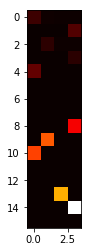

In [9]:
plt.imshow(Q, cmap= 'hot', interpolation='nearest')
plt.show()

In [10]:
for _ in range(1000):
    env.render()
    env.step(env.action_space.sample())

  (Up)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  

# The Q-Network Approach
##Implementing the network itself

In [11]:
tf.reset_default_graph()

In [12]:
env.action_space.n
env.observation_space.n

16

In [13]:
#INPUTS are dimensionated with OBSERVATIONS
#WEIGHTS are dimensionated with Q-MATRIX 

#These lines establish the feed-foward part of the network used to choose actions 
inputs1 = tf.placeholder(shape=[1,16], dtype=tf.float32)
W = tf.Variable(tf.random_uniform([16,4],0,0.01))
Qout = tf.matmul(inputs1,W)
predict = tf.argmax(Qout,1)

#Calculate the loss by taking the sum of squares difference between the
#target and prediction Q values.
nextQ = tf.placeholder(shape=[1,4],dtype=tf.float32)
loss = tf.reduce_sum(tf.square(nextQ - Qout))
trainer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
updateModel = trainer.minimize(loss)



## Training the network

In [17]:
init = tf.initialize_all_variables()
#Set learning parameters
y = .79
e = 0.2
num_episodes = 1000

#create lists to contain total reward and steps per episode 
jList = []
rList = []

with tf.Session() as sess:
    sess.run(init)
    for i in range(num_episodes):
        s = env.reset()
        rAll = 0
        d = False
        j = 0
        #The Q-Network
        while j < 99:
            j+=1
            a,allQ = sess.run([predict,Qout],feed_dict={inputs1:np.identity(16)[s:s+1]})
            if np.random.rand(1) < e:
                a[0] = env.action_space.sample()
                s1,r,d,_ = env.step(a[0])
                #Obtain the Q' values by feeding the new state through our network
                Q1 = sess.run(Qout,feed_dict={inputs1:np.identity(16)[s1:s1+1]})
            #Obtain maxQ' and set our target value for chosen action.
                maxQ1 = np.max(Q1)
                targetQ = allQ
                targetQ[0,a[0]] = r + y*maxQ1
            #Train our network using target and predicted Q values
                _,W1 = sess.run([updateModel,W],feed_dict={inputs1:np.identity(16)[s:s+1],nextQ:targetQ})
                rAll += r
                s = s1
                if d == True:
                #Reduce chance of random action as we train the model.
                    e = 1./((i/50) + 10)
                    break
            jList.append(j)
            rList.append(rAll)
print ("Percent of succesful episodes: {}".format(sum(rList)/num_episodes) + "%")

Instructions for updating:
Use `tf.global_variables_initializer` instead.


[2017-10-17 14:33:43,681] From /usr/local/lib/python3.6/site-packages/tensorflow/python/util/tf_should_use.py:175: initialize_all_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
Instructions for updating:
Use `tf.global_variables_initializer` instead.


Percent of succesful episodes: 0.0%


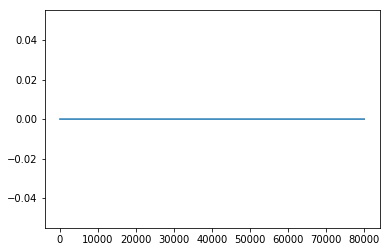

In [18]:
plt.plot(rList)

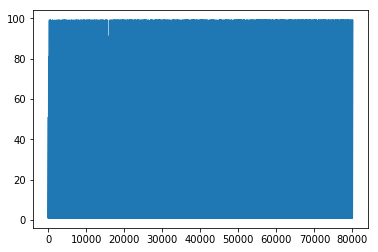

In [19]:
plt.plot(jList)

In [ ]:
## In this case, Q-table is more efficient than q-network